In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dir_ = '/content/drive/MyDrive/ift6759_trees' # Anni

# Setup

In [ ]:
# !git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

In [ ]:
import os

os.chdir(f'{dir_}/fastercnn-pytorch-training-pipeline')

In [ ]:
!pip install -r requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 KB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 9.5 MB/s eta 0:0

In [ ]:
!wandb disabled

W&B disabled.


In [ ]:
!pip install vision_transformers -q

  Preparing metadata (setup.py) ... done


# Create dfs (DO NOT RE-RUN!)

In [ ]:
# import pandas as pd

# subset = 'train'
# df = pd.read_csv(f'/content/drive/MyDrive/ift6759_trees/data/interim/ITC/{subset}_pixel_v3.csv')

In [ ]:
# tmp = pd.DataFrame()
# tmp['filename'] = df.rsFile_jpg
# tmp['width'] = 200
# tmp['height'] = 200
# tmp['class'] = 'tree'
# tmp['xmin'] = df.minx_pixel
# tmp['ymin'] = df.miny_pixel
# tmp['xmax'] = df.maxx_pixel
# tmp['ymax'] = df.maxy_pixel
# tmp.to_csv(f'/content/drive/MyDrive/ift6759_trees/data/external/tmp_{subset}.csv', index=False)

# Generate config files (DO NOT RE-RUN!)

In [ ]:
import os
import csv
import argparse
from collections import defaultdict
from lxml.etree import Element, SubElement, ElementTree


def write_xml(folder, filename, bbox_list):

    root = Element('annotation')
    SubElement(root, 'folder').text = folder
    SubElement(root, 'filename').text = filename
    # SubElement(root, 'path').text = './images' +  filename

    source = SubElement(root, 'source')
    SubElement(source, 'database').text = 'coco'

    # Details from first entry
    e_filename,  e_height, e_width,e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = bbox_list[0]   
    size = SubElement(root, 'size')
    SubElement(size, 'width').text = e_width
    SubElement(size, 'height').text = e_height
    SubElement(size, 'depth').text = '3'
    SubElement(root, 'segmented').text = '0'

    for entry in bbox_list:
        e_filename,  e_height, e_width, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = entry  

        obj = SubElement(root, 'object')
        SubElement(obj, 'name').text = e_class_name
        SubElement(obj, 'pose').text = 'Unspecified'
        SubElement(obj, 'truncated').text = '0'
        SubElement(obj, 'difficult').text = '0'

        bbox = SubElement(obj, 'bndbox')
        SubElement(bbox, 'xmin').text = e_xmin
        SubElement(bbox, 'ymin').text = e_ymin
        SubElement(bbox, 'xmax').text = e_xmax
        SubElement(bbox, 'ymax').text = e_ymax

    tree = ElementTree(root)  
    xml_filename = os.path.join('.', folder, os.path.splitext(filename)[0] + '.xml')
    tree.write(xml_filename, pretty_print=True)

def main(input ,output):
    # Initialize a list 
    entries_by_filename = defaultdict(list)

    # Read csv file
    with open( input, 'r', encoding='utf-8') as f_input_csv:
        csv_input = csv.reader(f_input_csv)
        header = next(csv_input)
        for row in csv_input:
            filename, width, height, class_name, xmin, ymin, xmax, ymax = row
            entries_by_filename[filename].append(row) 

    # Write to xml file
    for filename, entries in entries_by_filename.items():
        write_xml( output , filename, entries)    

    print(" Successfully Converted annotations from CSV to XML format .🎉🥳")  

In [ ]:
# Create output directory if not already there
subset = 'val'
if not os.path.exists(f'{subset}_labels'):
    os.mkdir(f'{subset}_labels')  

# Start Writing
main(f'../drive/MyDrive/ift6759_trees/data/external/tmp_{subset}.csv', f'{subset}_labels')

 Successfully Converted annotations from CSV to XML format .🎉🥳


In [ ]:
%%writefile data_configs/custom_data_RGB.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/../content/drive/MyDrive/ift6759_trees/data/processed/train/RGB'
TRAIN_DIR_LABELS: 'train_labels'
VALID_DIR_IMAGES: '/../content/drive/MyDrive/ift6759_trees/data/processed/val/RGB'
VALID_DIR_LABELS: 'val_labels'

# Class names.
CLASSES: [
    '__background__',
    'tree'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 2

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data_RGB.yaml


# Baseline: RGB - no aug - 40 epochs

## Training

In [ ]:
!python train.py --config data_configs/custom_data_RGB.yaml --epochs 40 --model fasterrcnn_resnet50_fpn --project-name neon_training_RGB_baseline --batch-size 4 --no-mosaic --img-size 200

Traceback (most recent call last):
  File "/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/train.py", line 13, in <module>
    from torch_utils.engine import (
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 941, in get_code
  File "<frozen importlib._bootstrap_external>", line 1040, in get_data
KeyboardInterrupt
^C


## Evaluate on validation set

In [ ]:
import matplotlib.pyplot as plt
from glob import glob

results_dir_path = '/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/outputs/training/neon_training_RGB_baseline'
valid_images = glob(f"{results_dir_path}/*.jpg")
print(valid_images)

for i in range(4):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!python eval.py --weights outputs/training/neon_training_RGB_baseline/best_model.pth --config data_configs/custom_data_RGB.yaml --model fasterrcnn_resnet50_fpn --batch-size 4 --img-size 200 --verbose

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, l

## Inference on test set

In [ ]:
!python inference.py --input /../content/drive/MyDrive/ift6759_trees/data/processed/test/RGB/ --weights outputs/training/neon_training_RGB_baseline/best_model.pth --threshold 0. --img-size 200 --no-labels

Building from model name arguments...
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Test instances: 9
Image 1 done...
--------------------------------------------------
Image 2 done...
--------------------------------------------------
Image 3 done...
--------------------------------------------------
Image 4 done...
--------------------------------------------------
Image 5 done...
-------------------------

In [ ]:
!pip install ensemble-boxes -q

In [ ]:
%pwd

'/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline'

In [ ]:
from ensemble_boxes import *
import numpy as np
from glob import glob

base_dir = '/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/outputs/inference/RGB_baselin_thres0.0'
bboxes_list = sorted(glob(os.path.join(base_dir, '*txt')))
scores_list = sorted(glob(os.path.join(base_dir, '*out')))


iou_thr = 0.02
skip_box_thr = 0.0
sigma = 0.1

outdir = f'./outputs/ensemble/RGB_baseline_ensemble_thres{iou_thr}'
os.makedirs(outdir, exist_ok=True)

for i in range(len(bboxes_list)):
  bboxes_path = bboxes_list[i]
  scores_path = scores_list[i]

  filename = os.path.basename(bboxes_path)
  print(filename)

  bboxes = np.loadtxt(bboxes_path, delimiter=" ", unpack=False)
  bboxes = np.divide(bboxes, 200)
  scores = np.loadtxt(scores_path, delimiter=" ", unpack=False)
  labels = np.zeros(len(scores))

  boxes, scores, labels = weighted_boxes_fusion([bboxes], [scores], [labels], weights=None, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
  final_boxes = boxes*200
  np.savetxt(os.path.join(outdir, filename), final_boxes, fmt='%i', delimiter=' ')

  


MLBS_20.txt
MLBS_25.txt
MLBS_34.txt
MLBS_39.txt
MLBS_42.txt
MLBS_9.txt
OSBS_26.txt
OSBS_32.txt
OSBS_35.txt


In [ ]:
boxes_list.max()

1.0

In [ ]:
boxes, scores, labels = weighted_boxes_fusion([boxes_list], [scores_list], [labels_list], weights=None, iou_thr=iou_thr, skip_box_thr=skip_box_thr)

In [ ]:
boxes.shape

(15, 4)

In [ ]:
import cv2
import numpy as np
from ensemble_boxes import *
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def show_image(image):
    cv2_imshow(image)
    # cv2.imshow(name, im.astype(np.uint8))
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


def gen_color_list(model_num, labels_num):
    color_list = np.zeros((model_num, labels_num, 3))
    colors_to_use = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (255, 0, 255), (255, 255, 0), (0, 0, 0)]
    total = 0
    for i in range(model_num):
        for j in range(labels_num):
            color_list[i, j, :] = colors_to_use[total]
            total = (total + 1) % len(colors_to_use)
    return color_list


def show_boxes(boxes_list, scores_list, labels_list, image_size=200):
    thickness = 2
    # color_list = gen_color_list(len(boxes_list), len(np.unique(labels_list)))
    image = plt.imread('/content/drive/MyDrive/ift6759_trees/data/processed/test/RGB/OSBS_26.jpg')
    for i in range(len(boxes_list)):
        for j in range(len(boxes_list[i])):
            x1 = int(image_size * boxes_list[i][j][0])
            y1 = int(image_size * boxes_list[i][j][1])
            x2 = int(image_size * boxes_list[i][j][2])
            y2 = int(image_size * boxes_list[i][j][3])
            lbl = labels_list[i][j]
            # cv2.rectangle(image, (x1, y1), (x2, y2), color_list[i][lbl], int(thickness * scores_list[i][j]))
            cv2.rectangle(image, (x1, y1), (x2, y2), int(thickness * scores_list[i][j]))
    show_image(image)

In [ ]:
def example_wbf_1_model(iou_thr=0.02, draw_image=True):
    """
    This example shows how to ensemble boxes from single model using WBF method    
    :return: 
    """

    boxes_list = np.loadtxt("/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/outputs/inference/res_3/OSBS_26.txt", delimiter=" ", unpack=False)
    boxes_list = np.divide(boxes_list, 200)
    scores_list = np.loadtxt("/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/outputs/inference/res_3/OSBS_26.out", delimiter=" ", unpack=False)
    labels_list = np.zeros(len(scores_list))

    if draw_image:
        show_boxes([boxes_list], [scores_list], [labels_list])

    boxes, scores, labels = weighted_boxes_fusion([boxes_list], [scores_list], [labels_list], weights=None, iou_thr=iou_thr, skip_box_thr=0.0)
    print(scores)
    if draw_image:
        show_boxes([boxes], [scores], [labels.astype(np.int32)])

    print(len(boxes))
    print(boxes)

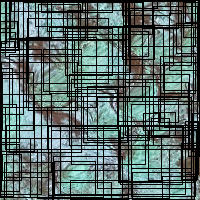

[0.433065   0.42170224 0.40823501 0.40775999 0.38342333 0.38338777
 0.376616   0.34814399 0.31807125 0.27019286 0.2419775  0.21033999
 0.17385    0.16080286 0.11601   ]


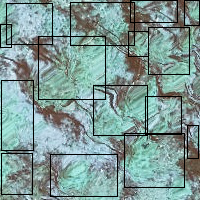

15
[[0.92279226 0.00220775 0.995      0.12655814]
 [0.74027759 0.13576746 0.94676089 0.37406179]
 [0.46559739 0.4269346  0.7380383  0.67725468]
 [0.00967371 0.76868308 0.16110851 0.97144449]
 [0.19083151 0.18475252 0.5299834  0.49910063]
 [0.03076109 0.01647302 0.26190645 0.22036405]
 [0.62322319 0.6693911  0.92098129 0.93990606]
 [0.00545649 0.40365583 0.16618462 0.7503193 ]
 [0.25431764 0.77463692 0.58653486 0.98253667]
 [0.72599721 0.48481387 0.90897715 0.6703487 ]
 [0.35061041 0.01337273 0.67170376 0.22820885]
 [0.65366501 0.00192034 0.88867313 0.11178829]
 [0.64       0.155      0.74       0.28      ]
 [0.93548232 0.62748045 0.99098933 0.79328525]
 [0.00165341 0.12296515 0.05768716 0.23728698]]


In [ ]:
example_wbf_1_model()

In [ ]:
import matplotlib.pyplot as plt
from glob import glob

pred_dir_path = '/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/outputs/inference/res_1'
test_images = sorted(glob(f"{pred_dir_path}/*.jpg"))
print(test_images)

for i in range(9):
    plt.figure(figsize=(10, 7))
    image = plt.imread(test_images[i])
    plt.title('')
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Visualize data with label

interactive(children=(Dropdown(description='Season', index=2, options=('train', 'val', 'test'), value='test'),…

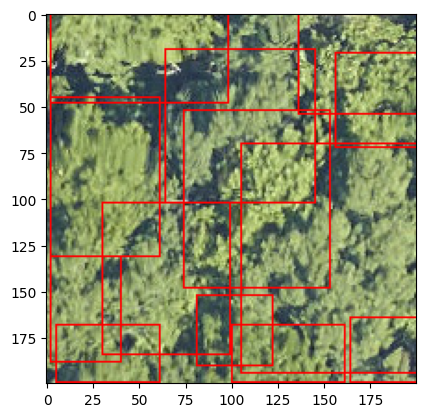

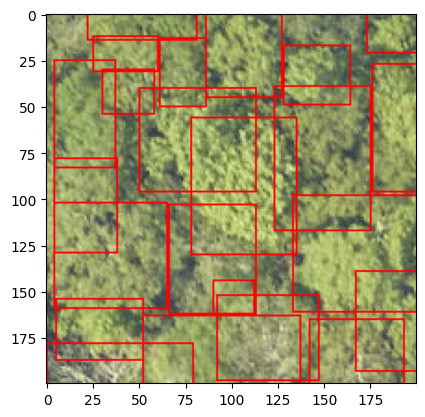

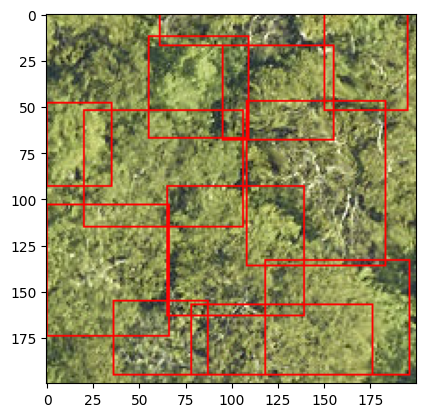

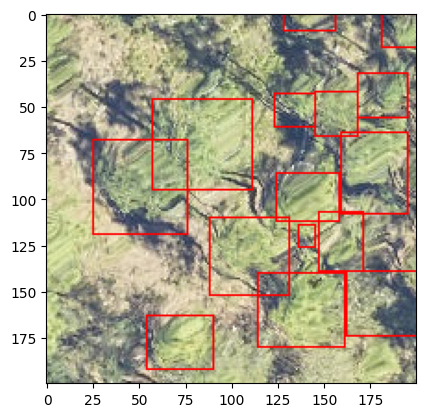

In [ ]:
def draw_bounding_box(img, row):
    
    x_min = row.minx_pixel
    y_min = row.miny_pixel
    x_max = row.maxx_pixel
    y_max = row.maxy_pixel

    img_with_bboxes = cv2.rectangle(img, (x_min,y_min),(x_max,y_max), (255, 0, 0), 1)
    plt.imshow(img_with_bboxes.astype("uint8"))


import pandas as pd
import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets
from ipywidgets import interact
from glob import glob
import os

@ interact(subset=widgets.Dropdown(options=['train', 'val', 'test'], value='test', description='Season'))
def choose_subset(subset):
  """
  Display rbg image with its bounding boxes
  """

  base_dir = os.path.join(dir_,'data/processed')

  subset_list = sorted(glob(os.path.join(base_dir, subset, 'RGB', '*.jpg'))) # list of subset files' path
  subset_csv = os.path.join(dir_,f'data/interim/ITC/{subset}_pixel_v3.csv') # subset shapefile path

  pred_dir_path = '/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/outputs/inference/res_1'
  pred_list = sorted(glob(f"{pred_dir_path}/*.jpg"))
  
  @ interact(idx=widgets.IntSlider(min=0, max=len(subset_list)-1, step=1, value=0, description='Case #:'))
  def show_rbg_with_bboxes(idx):
    
    img_path = subset_list[idx] 
    img_name = os.path.basename(img_path) # get filename

    # img = rasterio.open(img_path) 
    # img = img.read(1)

    img = plt.imread(img_path)
    
    bboxes = pd.read_csv(subset_csv) 
    bboxes_img = bboxes[bboxes.rsFile_jpg == img_name] # get image bounding boxes 
    
    pred_path = pred_list[idx]
    pred_name = os.path.basename(pred_path)
    image = plt.imread(pred_path)
    plt.title(pred_name)
    plt.imshow(image)
    plt.show()

    for index, row in bboxes_img.iterrows():
        draw_bounding_box(img, row)
          

# RGB - aug - 40 epochs

## Training

In [ ]:
!python train.py --config data_configs/custom_data_RGByaml --epochs 40 --model fasterrcnn_resnet50_fpn --project-name neon_training_RGBH-pngaug40 --batch-size 4 --use-train-aug --no-mosaic --img-size 200

Not using distributed mode
device cuda
2023-03-30 00:16:25.518209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 00:16:26.594827: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-30 00:16:26.594963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such

## Evaluate on validation set

In [ ]:
import matplotlib.pyplot as plt
from glob import glob

results_dir_path = '/content/drive/MyDrive/ift6759_trees/fastercnn-pytorch-training-pipeline/outputs/training/neon_training_RGBH-pngaug40'
valid_images = glob(f"{results_dir_path}/*.jpg")
print(valid_images)

for i in range(10):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!python eval.py --weights outputs/training/neon_training_RGBH-pngaug40/best_model.pth --config data_configs/custom_data_RGBH-png.yaml --model fasterrcnn_resnet50_fpn --verbose

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, l

## Inference on test set

In [ ]:
!python inference.py --input /../content/drive/MyDrive/ift6759_trees/data/processed/test/RGBH-png/ --weights outputs/training/neon_training_RGBH-pngaug40/last_model_state.pth --threshold 0.5 --img-size 200

Building from model name arguments...
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Test instances: 9
Image 1 done...
--------------------------------------------------
Image 2 done...
--------------------------------------------------
Image 3 done...
--------------------------------------------------
Image 4 done...
--------------------------------------------------
Image 5 done...
-------------------------